In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, scipy, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
matplotlib 3.5.3
seaborn 0.12.2


# 2-6-1 범주형 자료 분석

## 0. 데이터셋 소개

### Titanic

[Titanic](https://www.kaggle.com/competitions/titanic/data) 탑승객의 생존 유무를 담은 데이터셋 입니다.

|Data|Dictionary|Key|
|:----|:----------|:---|
|PassengerId|Passenger Id|Index|
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Name|
|Sex|Sex|
|Age|Age in years|
|Sibsp|# of siblings / spouses aboard the Titanic|
|Parch|# of parents / children aboard the Titanic|	
|Ticket|Ticket number|
|Fare|Passenger fare|	
|Cabin|Cabin number|
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


다양한 형식의 데이터를 가지고 있으며, 여러 가지 아이디어를 생각하고 시도할 만한 요소가 많게끔 기획된 데이터셋입니다.

In [2]:
df_titanic = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

In [4]:
from scipy.stats import chi2, t

## 1. 카이제곱 검정(Chi-Squared Test)

### 카이제곱 적합성 검정

k개의 범주를 지닌 범주형 변수의 범주들의 출현 확률을 $p_i, i = 1, ... k$ 라고 할 때,

> $H_0$: 주어진 범주의 출현 확률 $p_1, ... p_k$는 사실이다.
>
> $H_1$: 주어진 범주의 출현 확률 $p_1, ... p_k$는 사실이 아니다.

즉, 귀무가설에서 범주들의 확률이 적합한지를 확인하는 검정입니다.


**증거의 확률 분포 및 통계량**

$H_0$이 맞다면,

> 표집에서 측정한 빈도가 $X_1, ... X_k$ 라고 한다면,
>
> $E(X_1), ... E(X_k) = np_i, ... , np_k$ 가 됩니다.

$X^2 = \sum_{i=1}^k\frac{\left(X_i - np_i\right)^2}{np_i} \sim \chi^2(k - 1)$

$\chi^2$ 분포의 자유도는 $\sum_{i=1}^{k}p_i = 1$에서 k의 확률 변수중 하나 가 고정이 되어 k - 1이됩니다.

차이가 커질 수록, 대립 가설에 가까울 수록 $X_i$와 $np_i$ 의 오차가 커지게 됩니다.

따라서, 카이제곱 적합성 검정은 우측 꼬리 검정입니다.



**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_titanic 에서 성별(Sex)의 비율이 아래와 같은지.

|Sex|p|
|---|---|
|male|0.5|
|female|0.5|

검정해 보세요.
    
</div>

In [5]:
n = len(df_titanic)
np = pd.Series([0.5, 0.5], index=['male', 'female']) * n
Chi2 = ((df_titanic['Sex'].value_counts() - np) ** 2 / np).sum()
print("검정통계량(Chi2): {}, pvalue: {}".format(Chi2, chi2.sf(Chi2, df_titanic['Sex'].nunique() - 1)))

검정통계량(Chi2): 77.63075196408529, pvalue: 1.2422095313910336e-18


## 2. 카이제곱 독립성/동질성 검정

(A, B) 은 짝(pair)으로 된 확률 변수입니다.

기상 데이터를 예를 들자면

|A-날씨|B-바람 방향|
|---|---|
|맑음|동|
|흐림|서|
|맑음|동|
|흐림|서|
|비|남|
|...|...|

$H_0$: A의 범주와 상관없이 B의 분포는 같다.

$H_1$: A의 범주에 따라 B의 분포는 다르다.

독립성/동질성 검정은 위 가설을 바라보는 관점에 따른 해석이 다릅니다.

### 독립성 검정

$H_0$: A와 B는 독립이다. (연관성이 없다)

$H_1$: A와 B는 독립이 아니다. (연관성이 있다.)

### 동질성 검정

$H_0$: A의 범주에 따른 B의 성질은 동일하다.

$H_1$: A의 범주에 따른 B의 성질은 동일하지 않다.


**증거의 확률 분포 및 통계량**

$H_0$이 맞다면, 

> A와 B는 독립입니다.

따라서,

> A의 범주의 확률이 $p_{A_1}, ..., p_{A_n}$, $\sum_{i=1}^np_{A_i} = 1$ (n: 변수 A의 범주 수)
>
> B의 범주의 확률이 $p_{B_1}, ..., p_{B_m}$, $\sum_{i=1}^mp_{B_i} = 1$ (m: 변수 B의 범주 수)

이라면

> $p_{i,j} = p_{A_i}p_{B_j}$ 가 됩니다. $p_{i,j}$: $A_i$이고 $B_j$일 확률


$p_{A_1}, ..., p_{A_n} = \hat{p}_{A_1}, ..., \hat{p}_{A_n}$

$p_{B_1}, ..., p_{B_m} = \hat{p}_{B_1}, ..., \hat{p}_{B_m}$

라고 가정하면, 

$X_{i,j}$는 $A_i$와 $B_j$의 빈도일 때

> $E(X_{i,j}) = N\hat{{p}_{i, j}}$ (N: 전체 표본수)

아래와 같이 적합성 검정과 같은 통계량을 만듭니다.


> $X^2 = \sum_{i=1}^k\frac{\left(X_{i,j} - N\hat{{p}_{i,j}}\right)^2}{N\hat{p}_{i,j}} \sim \chi^2((n - 1)×(m - 1))$


**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_titanic 에서 Survived와 Embarked가 독립인지 카이제곱 독립성 검정으로 검정해봅니다.
    
</div>

In [6]:
O_conti = pd.crosstab(index=df_titanic['Survived'], columns=df_titanic['Embarked'])
O_conti

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


In [7]:
df_titanic['Survived'].value_counts().rename('val').to_frame()

,val
0,549
1,342


In [8]:
df_titanic['Embarked'].value_counts(normalize=True).rename('val').to_frame().T

,S,C,Q
val,0.725028,0.188552,0.08642


In [9]:
# 예상 빈도수는 위 두 행렬의 행렬 곱으로 구할 수 있습니다.
# 곱의 기준이 되는 Survived의 빈도 테이블 컬럼명과 Embarked의 인덱스명을 동일하게(val) 맞춰야 정상 동작합니다.
E_conti = df_titanic['Survived'].value_counts().rename('val').to_frame().dot(
    df_titanic['Embarked'].value_counts(normalize=True).rename('val').to_frame().T
)
E_conti

,S,C,Q
0,398.040404,103.515152,47.444444
1,247.959596,64.484848,29.555556


In [10]:
Chi2 = ((O_conti - E_conti) ** 2 / E_conti).sum().sum()
print("검정통계량(Chi2): {}, pvalue: {}".format(
    Chi2, 
    chi2.sf(Chi2, (df_titanic['Survived'].nunique() - 1) * (df_titanic['Embarked'].nunique() - 1)))
)

검정통계량(Chi2): 25.964452881874788, pvalue: 2.300862648144953e-06


In [11]:
# chi2 독립성 검정은 scipy.stats.chi2_contingency로 구할 수 있습니다.
from scipy.stats import chi2_contingency

chi2_contingency(O_conti)

(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  47.44444444, 398.04040404],
        [ 64.48484848,  29.55555556, 247.95959596]]))

# 2-6-2 상관 분석(Correlation Analysis)

## 1. 피어슨(Pearson) 상관계수

(X, Y)는 짝(pair)으로 된 확률 변수입니다.

X, Y 가 정규분포를 따른다고 가정할 때, 서로 연관성을 분석하기 위해 많이 사용 됩니다.

피어슨 상관계수는 다음과 같습니다.

> $\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_X\sigma_Y}$

> $\rho_{X,Y}= \frac{E[XY] - E[X]E[Y]}{\sqrt{E[X^2] - E[X]^2}\sqrt{E[Y^2] - E[Y]^2}}$

입니다.

$-1 \le \rho_{X,Y} \le 1$

$\rho_{X,Y}$를 이용한 상관 관계 분석

$H_0: \rho_{X,Y} = 0$

$H_1: \rho_{X,Y} ≠ 0$

**확률 분포 및 검정 통계량**

$r_{xy}=\frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n(y_i - \bar{y})^2}}$

$r_{xy}=\frac{1}{n - 1}\sum_{i=1}^n\left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)$


> $t = \sqrt{n - 2}\frac{r_{X,Y}}{\sqrt{1 - r_{X,Y}^2}} \sim t(n - 2)$

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_titanic 에서 Age 와 Fare의 피어슨 상관계수를 구해봅니다. 둘 중에 하나라도 결측인 경우는 제외 합니다.
    
</div>

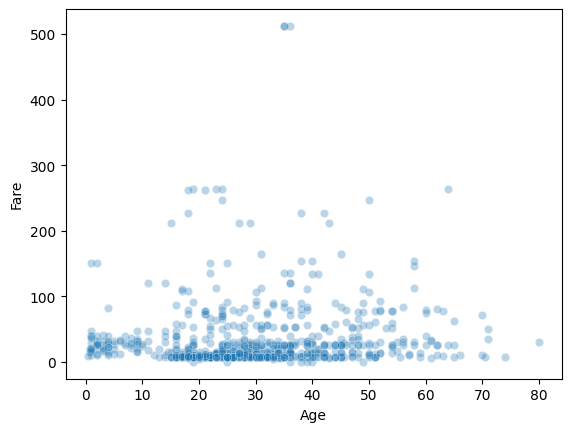

In [12]:
sns.scatterplot(data=df_titanic, x='Age', y='Fare', alpha=0.3)
plt.show()

In [13]:
df_corr = df_titanic.loc[
    df_titanic[['Age', 'Fare']].notna().all(axis=1), ['Age', 'Fare']
]

In [14]:
n = len(df_corr)
r_xy = df_corr.apply(lambda x: (x - x.mean()) / x.std(), axis=0)\
    .pipe(lambda x: (x['Age'] * x['Fare']).sum() / (n - 1))
r_xy

0.09606669176903891

In [15]:
# pd.DataFrame의 corr 메소드는 변수 간의 correlation Matrix를 구합니다.
df_corr[['Age', 'Fare']].corr() # method='pearson'

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [16]:
t_stat = -abs(((n - 2) ** 0.5) * r_xy / ((1 - r_xy ** 2) ** 0.5))
print("검정통계량(t): {}, pvalue: {}".format(t_stat, t.cdf(t_stat, n - 2) * 2))

검정통계량(t): -2.5752900336611475, pvalue: 0.010216277504447025


In [17]:
# scipy.stats.pearsonr 에서는 상관계수와 함계 pvalue까지 제공합니다.
from scipy.stats import pearsonr
pearsonr(df_corr['Age'], df_corr['Fare'])

(0.09606669176903891, 0.010216277504442105)

## 2. 스피어만(Spearman) 상관계수

(X, Y)는 짝(pair)으로 된 확률 변수입니다.

X, Y가 정규분포에서 심하게 벗어나는 상황에서 상관관계를 측정합니다.

X와 Y의 순위 변수를 R(X), R(Y)로 하면 

> $\rho_{R(X),R(Y)}=\frac{cov(R(X),R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}}$

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_titanic 에서 Age 와 Fare의 스피어만 상관계수를 구해봅니다. 둘 중에 하나라도 결측인 경우는 제외 합니다.

</div>

In [18]:
r_xy = df_corr.rank(axis=0).apply(lambda x: (x - x.mean()) / x.std(), axis=0)\
    .pipe(lambda x: (x['Age'] * x['Fare']).sum() / (n - 1))
r_xy

0.13505121773428777

In [19]:
df_corr[['Age', 'Fare']].corr('spearman') # method='pearson'

,Age,Fare
Age,1.000000,0.135051
Fare,0.135051,1.000000


In [20]:
t_stat = -abs(((n - 2) ** 0.5) * r_xy / ((1 - r_xy ** 2) ** 0.5))
print("검정통계량(t): {}, pvalue: {}".format(t_stat, t.cdf(t_stat, n - 1) * 2))

검정통계량(t): -3.6369353075237427, pvalue: 0.00029578047022793346


In [21]:
# scipy.stats.spearmanr 에서는 상관계수와 함계 pvalue까지 제공합니다.
from scipy.stats import spearmanr
spearmanr(df_corr['Age'], df_corr['Fare'])

SpearmanrResult(correlation=0.1350512177342878, pvalue=0.0002958090324306091)

## 3. 켄달(Kendall) 순위상관계수

(X, Y)은 짝(pair)으로 된 확률 변수입니다.

모든 표본들의 짝(pair))에 대해서 X의 대소관계와 Y의 대소관계가 일치하면 Concordant, 그렇지 않으면 Discordant라고 합니다.

$\tau = \frac{C - D}{C + D}$, C: Concordant의 수, D: Disccordant의 수

$\tau$를 이용한 상관 관계 분석

$H_0$: X, Y는 서로 독립

$H_1$: X, Y는 서로 독립이 아니다.

대표본일 경우, 

$\tau = \frac{C - D}{C + D} \sim N(0, \sqrt{\frac{2(2n + 5)}{9n(n-1)}})$

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_titanic 에서 Age 와 Fare의 켄달(Kendall) 상관계수를 구해봅니다. 둘 중에 하나라도 결측인 경우는 제외하고, 

중복된 값은 한 건만 남기고 제외합니다.
    
</div>

In [22]:
import itertools
df_kendall = df_corr.drop_duplicates()
df_kendall_stat = pd.DataFrame(
    itertools.combinations(df_kendall.index.values, 2),
    columns=['A', 'B']
).assign(
    Age_A = lambda x: x['A'].map(df_kendall['Age']),
    Age_B = lambda x: x['B'].map(df_kendall['Age']),
    Fare_A = lambda x: x['A'].map(df_kendall['Fare']),
    Fare_B = lambda x: x['B'].map(df_kendall['Fare'])
)
df_kendall_stat

,A,B,Age_A,Age_B,Fare_A,Fare_B
0,1,2,22.0,38.0,7.250,71.2833
1,1,3,22.0,26.0,7.250,7.9250
2,1,4,22.0,35.0,7.250,53.1000
3,1,5,22.0,35.0,7.250,8.0500
4,1,7,22.0,54.0,7.250,51.8625
...,...,...,...,...,...,...
203198,886,890,39.0,26.0,29.125,30.0000
203199,886,891,39.0,32.0,29.125,7.7500
203200,888,890,19.0,26.0,30.000,30.0000
203201,888,891,19.0,32.0,30.000,7.7500


In [23]:
n = len(df_kendall_stat)
C = ((df_kendall_stat['Age_A'] - df_kendall_stat['Age_B']) * (df_kendall_stat['Fare_A'] - df_kendall_stat['Fare_B']) > 0).sum()
D = ((df_kendall_stat['Age_A'] - df_kendall_stat['Age_B']) * (df_kendall_stat['Fare_A'] - df_kendall_stat['Fare_B']) < 0).sum()
tau = (C - D) / (C + D)
tau

0.08345196180247727

In [24]:
df_kendall[['Age', 'Fare']].corr(method='kendall')

,Age,Fare
Age,1.000000,0.082243
Fare,0.082243,1.000000


In [25]:
from scipy.stats import kendalltau
kendalltau(df_kendall['Age'], df_kendall['Fare'])

KendalltauResult(correlation=0.08224308958143599, pvalue=0.00218152006268166)